In [157]:
# Import components
import datetime as dt
import math
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pmdarima as pm
import seaborn as sns
from matplotlib import pyplot as pltw
from pmdarima import arima, datasets, model_selection, utils
from scipy import spatial
from scipy.spatial import distance
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.tsa.seasonal import STL

warnings.simplefilter("ignore")

plt.rcParams["font.family"] = "Hiragino Maru Gothic Pro"
plt.style.use("ggplot")  # グラフのスタイル
plt.rcParams["figure.figsize"] = [12, 9]  # グラフサイズ設定

In [158]:
df = pd.read_csv("../datasets/fixed_battery_log_2_copy.csv")
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()

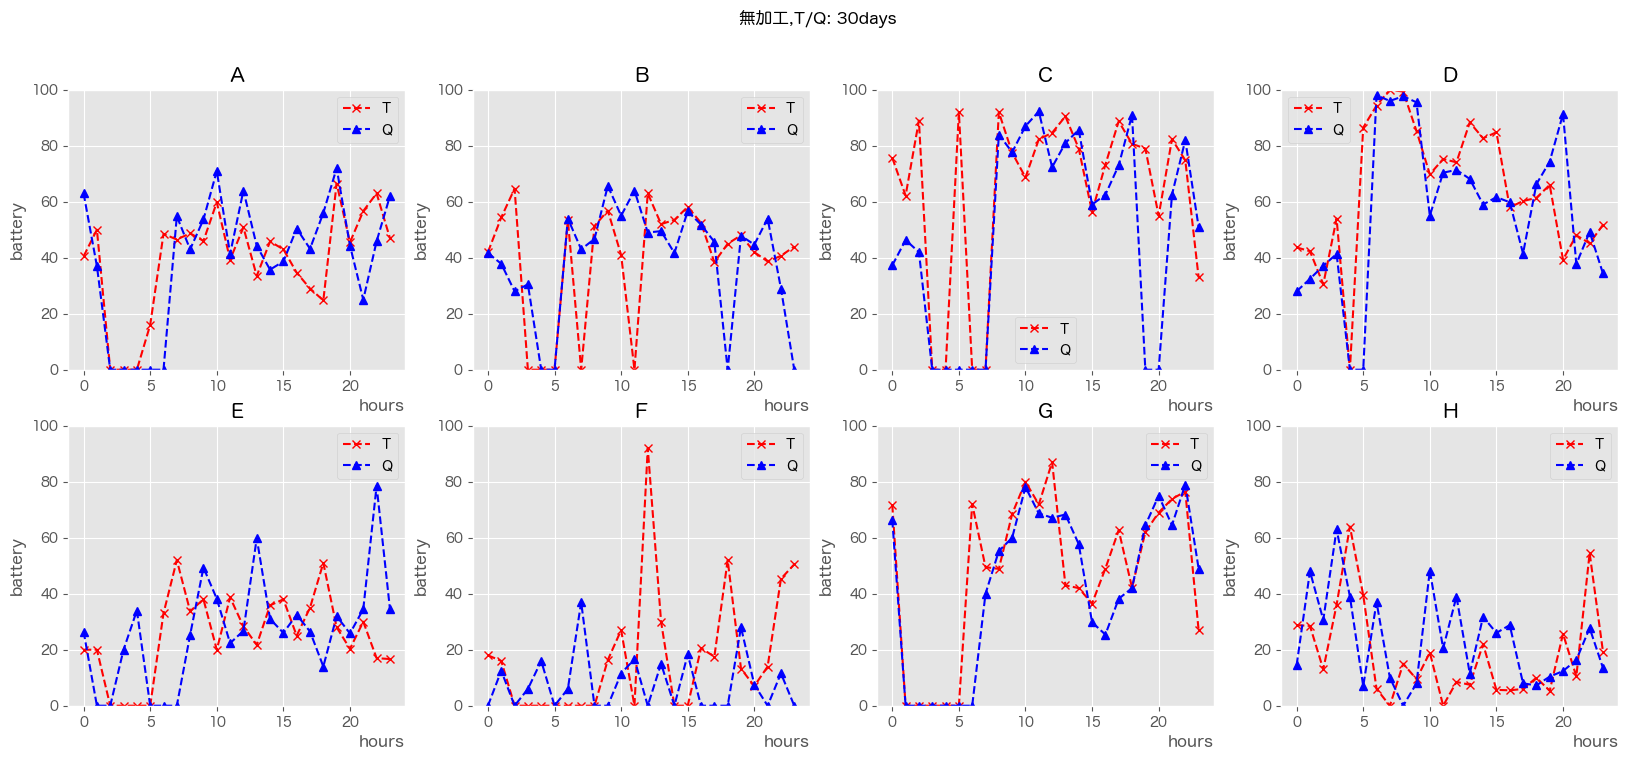

In [164]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
p_name = ["A", "B", "C", "D", "E", "F", "G", "H"]
fig.suptitle("無加工,T/Q: 30days")

for g in range(len(users)):
    n = 30
    user = users[g]
    f_date = dt.datetime.strptime("2021-12-20", "%Y-%m-%d")
    l_date = f_date + dt.timedelta(days=n)

    f2_date = l_date + dt.timedelta(days=1)
    l2_date = f2_date + dt.timedelta(days=n)

    # print(f_date, l_date, f2_date, l2_date)

    Nari_T = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f_date)
            & (df["date"] < l_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    hoge = []
    for i in range(0, 24):
        hoge.append(
            np.array(
                Nari_T.loc[
                    (Nari_T["time_to_num"] > 3600 * i)
                    & (Nari_T["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    hoge = np.nan_to_num(hoge)
    # print(hoge)

    Nari_Q = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f2_date)
            & (df["date"] < l2_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    foo = []
    for i in range(0, 24):
        foo.append(
            np.array(
                Nari_Q.loc[
                    (Nari_Q["time_to_num"] > 3600 * i)
                    & (Nari_Q["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    foo = np.nan_to_num(foo)
    # print(foo)

    if g < 4:
        axes[0, g].set_title("{}".format(p_name[g]))
        axes[0, g].plot(hoge, "x--r", label="T")
        axes[0, g].plot(foo, "^--b", label="Q")
        axes[0, g].set_xlabel("hours", loc="right")
        axes[0, g].set_ylabel("battery")
        axes[0, g].set_ylim(0, 100)
        axes[0, g].legend()
    else:
        axes[1, (g - 4)].set_title("{}".format(p_name[g]))
        axes[1, (g - 4)].plot(hoge, "x--r", label="T")
        axes[1, (g - 4)].plot(foo, "^--b", label="Q")
        axes[1, (g - 4)].set_ylim(0, 100)
        axes[1, (g - 4)].set_xlabel("hours", loc="right")
        axes[1, (g - 4)].set_ylabel("battery")
        axes[1, (g - 4)].legend()

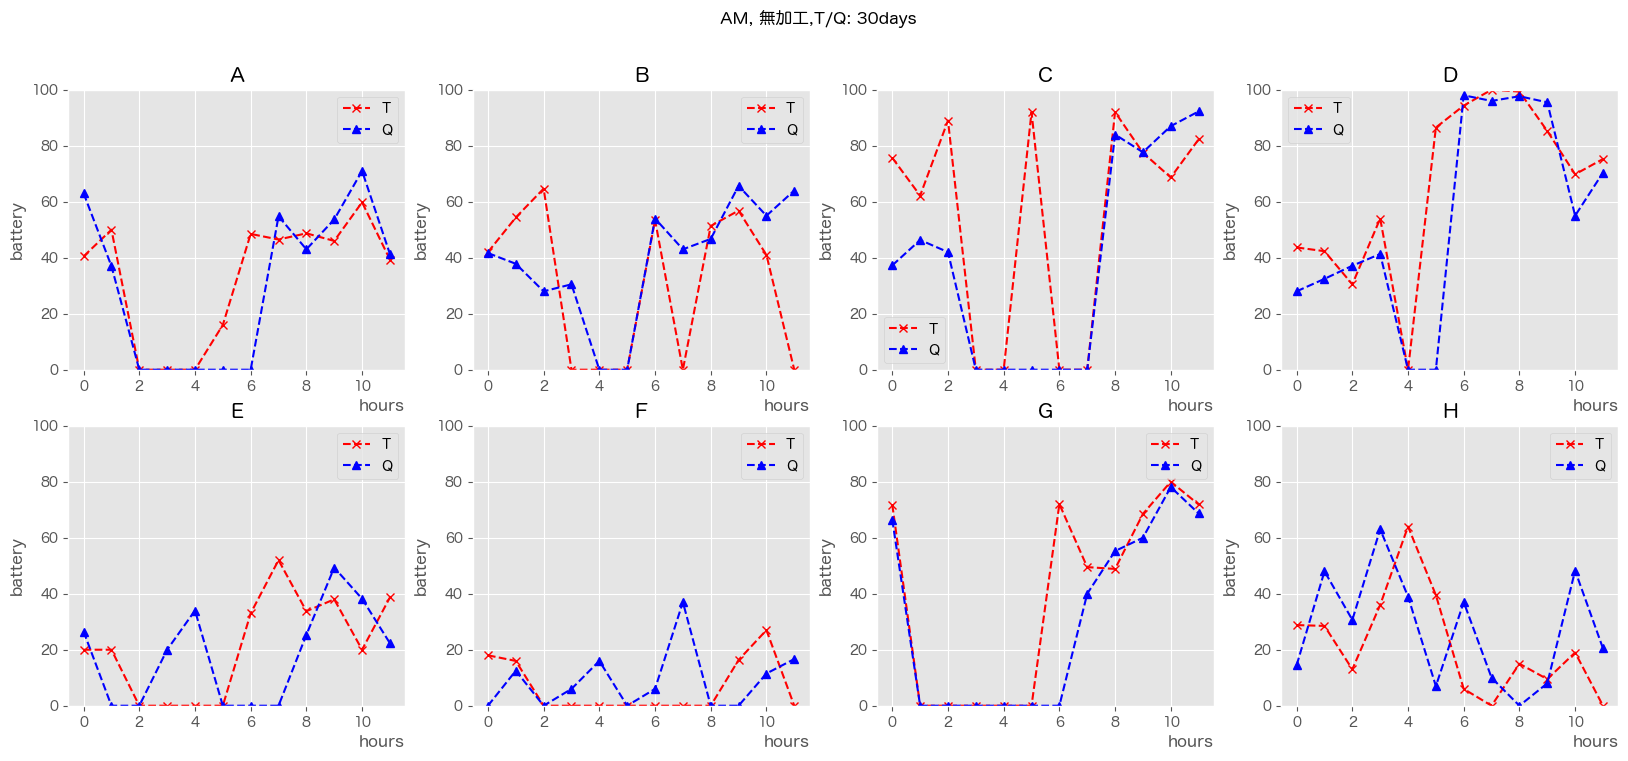

In [170]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
p_name = ["A", "B", "C", "D", "E", "F", "G", "H"]
fig.suptitle("AM, 無加工,T/Q: 30days")

for g in range(len(users)):
    n = 30
    user = users[g]
    f_date = dt.datetime.strptime("2021-12-20", "%Y-%m-%d")
    l_date = f_date + dt.timedelta(days=n)

    f2_date = l_date + dt.timedelta(days=1)
    l2_date = f2_date + dt.timedelta(days=n)

    # print(f_date, l_date, f2_date, l2_date)

    Nari_T = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f_date)
            & (df["date"] < l_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    hoge = []
    for i in range(0, 12):
        hoge.append(
            np.array(
                Nari_T.loc[
                    (Nari_T["time_to_num"] > 3600 * i)
                    & (Nari_T["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    hoge = np.nan_to_num(hoge)
    # print(hoge)

    Nari_Q = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f2_date)
            & (df["date"] < l2_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    foo = []
    for i in range(0, 12):
        foo.append(
            np.array(
                Nari_Q.loc[
                    (Nari_Q["time_to_num"] > 3600 * i)
                    & (Nari_Q["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    foo = np.nan_to_num(foo)
    # print(foo)

    if g < 4:
        axes[0, g].set_title("{}".format(p_name[g]))
        axes[0, g].plot(hoge, "x--r", label="T")
        axes[0, g].plot(foo, "^--b", label="Q")
        axes[0, g].set_xlabel("hours", loc="right")
        axes[0, g].set_ylabel("battery")
        axes[0, g].set_ylim(0, 100)
        axes[0, g].legend()
    else:
        axes[1, (g - 4)].set_title("{}".format(p_name[g]))
        axes[1, (g - 4)].plot(hoge, "x--r", label="T")
        axes[1, (g - 4)].plot(foo, "^--b", label="Q")
        axes[1, (g - 4)].set_ylim(0, 100)
        axes[1, (g - 4)].set_xlabel("hours", loc="right")
        axes[1, (g - 4)].set_ylabel("battery")
        axes[1, (g - 4)].legend()

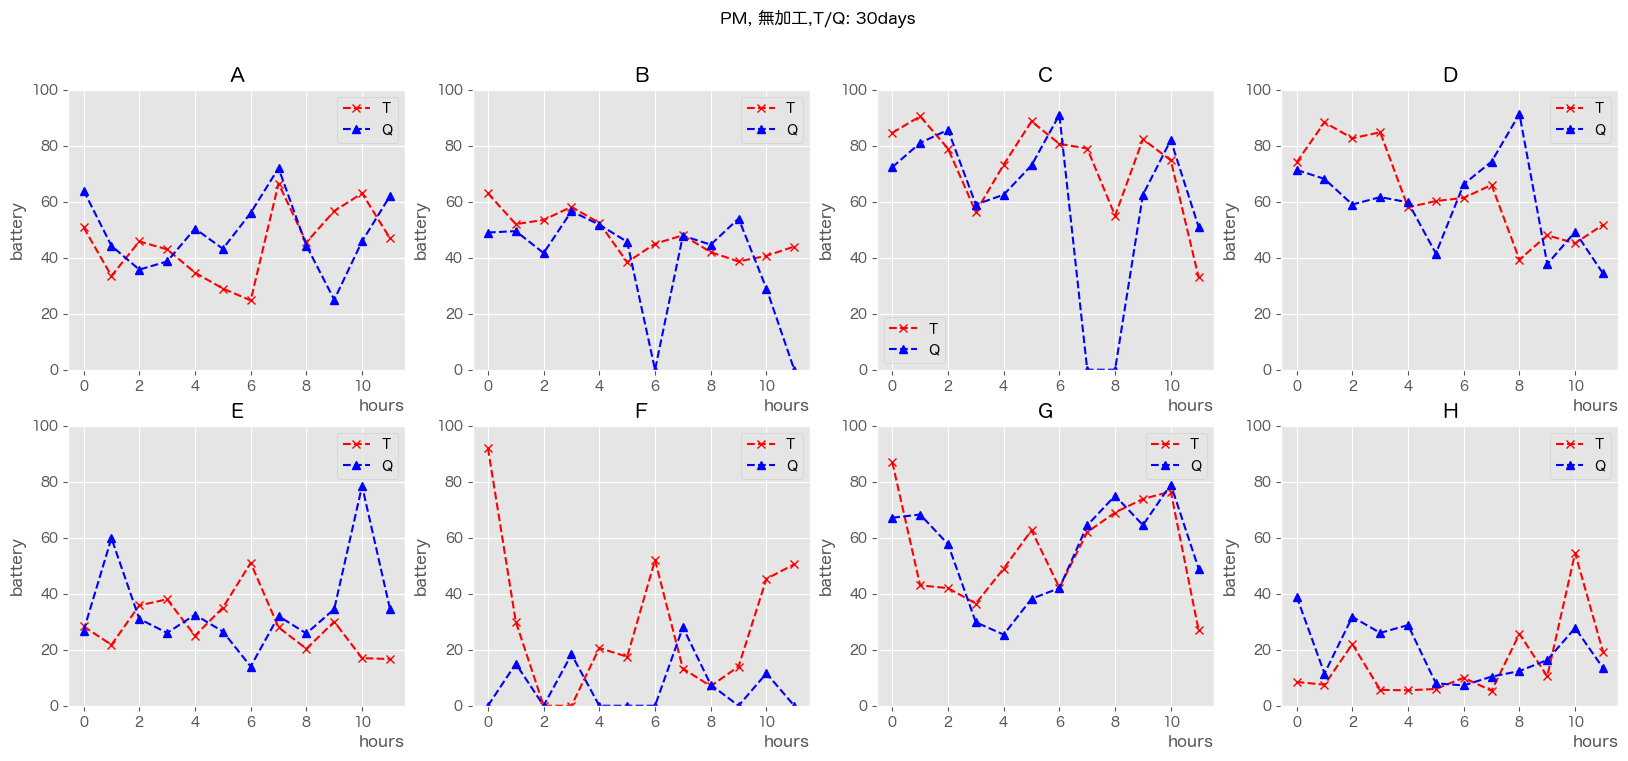

In [180]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
p_name = ["A", "B", "C", "D", "E", "F", "G", "H"]
fig.suptitle("PM, 無加工,T/Q: 30days")

for g in range(len(users)):
    n = 30
    user = users[g]
    f_date = dt.datetime.strptime("2021-12-20", "%Y-%m-%d")
    l_date = f_date + dt.timedelta(days=n)

    f2_date = l_date + dt.timedelta(days=1)
    l2_date = f2_date + dt.timedelta(days=n)

    # print(f_date, l_date, f2_date, l2_date)

    Nari_T = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f_date)
            & (df["date"] < l_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    hoge = []
    for i in range(12, 24):
        hoge.append(
            np.array(
                Nari_T.loc[
                    (Nari_T["time_to_num"] > 3600 * i)
                    & (Nari_T["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    hoge = np.nan_to_num(hoge)
    # print(hoge)

    Nari_Q = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f2_date)
            & (df["date"] < l2_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    foo = []
    for i in range(12, 24):
        foo.append(
            np.array(
                Nari_Q.loc[
                    (Nari_Q["time_to_num"] > 3600 * i)
                    & (Nari_Q["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    foo = np.nan_to_num(foo)
    # print(foo)

    if g < 4:
        axes[0, g].set_title("{}".format(p_name[g]))
        axes[0, g].plot(hoge, "x--r", label="T")
        axes[0, g].plot(foo, "^--b", label="Q")
        axes[0, g].set_xlabel("hours", loc="right")
        axes[0, g].set_ylabel("battery")
        axes[0, g].set_ylim(0, 100)
        # axes[0, g].set_xlim([12, 24])
        axes[0, g].legend()
    else:
        axes[1, (g - 4)].set_title("{}".format(p_name[g]))
        axes[1, (g - 4)].plot(hoge, "x--r", label="T")
        axes[1, (g - 4)].plot(foo, "^--b", label="Q")
        axes[1, (g - 4)].set_ylim(0, 100)
        # axes[1, (g - 4)].set_xlim([12, 24])
        axes[1, (g - 4)].set_xlabel("hours", loc="right")
        axes[1, (g - 4)].set_ylabel("battery")
        axes[1, (g - 4)].legend()

1137
459
40.369393139841684


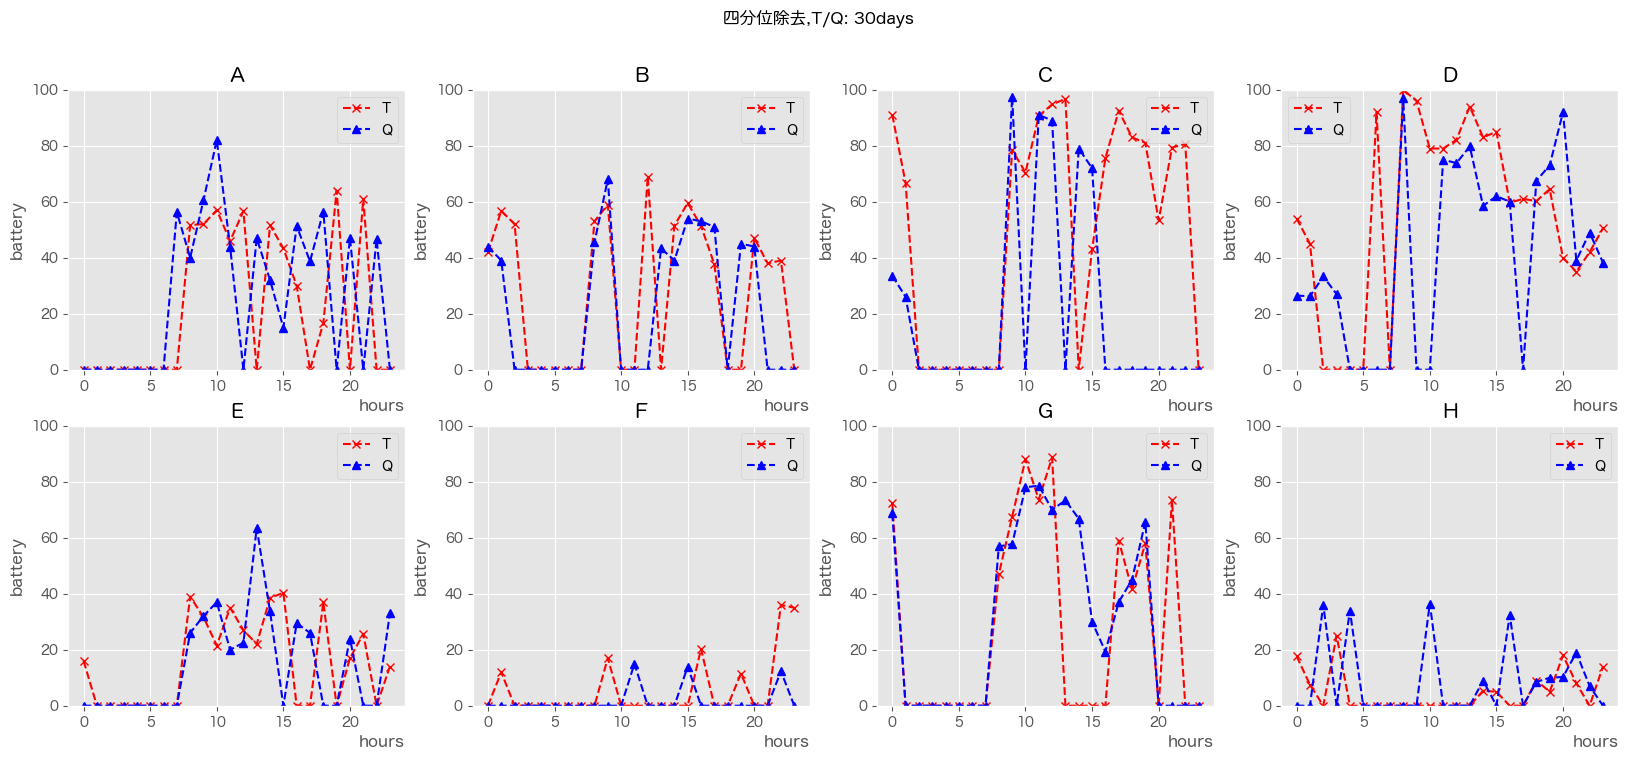

In [181]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
p_name = ["A", "B", "C", "D", "E", "F", "G", "H"]
fig.suptitle("四分位除去,T/Q: 30days")

ori, after = 0, 0

for g in range(len(users)):
    n = 30
    user = users[g]
    f_date = dt.datetime.strptime("2021-12-20", "%Y-%m-%d")
    l_date = f_date + dt.timedelta(days=n)

    f2_date = l_date + dt.timedelta(days=1)
    l2_date = f2_date + dt.timedelta(days=n)

    # print(f_date, l_date, f2_date, l2_date)

    Nari_T = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f_date)
            & (df["date"] < l_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    hoge = []
    baa = []
    for i in range(0, 24):
        baa = np.array(
            Nari_T.loc[
                (Nari_T["time_to_num"] > 3600 * i)
                & (Nari_T["time_to_num"] < 3600 * (i + 1))
            ]["battery"]
        )
        # print(len(baa), len(baa[np.where((baa >= q1) & (baa <= q3))]))
        # print(baa)
        # print(baa[np.where((baa >= q1) & (baa <= q3))])
        ori += len(baa)
        if len(baa) != 1:
            try:
                q1 = np.percentile(baa, q=25)
                q3 = np.percentile(baa, q=75)
                after += len(baa[np.where((baa >= q1) & (baa <= q3))])
                hoge.append(baa[np.where((baa >= q1) & (baa <= q3))].mean())
            except:
                hoge.append(0)
        else:
            hoge.append(0)
    hoge = np.nan_to_num(hoge)
    # print(hoge)

    Nari_Q = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f2_date)
            & (df["date"] < l2_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    foo = []
    baa = []
    for i in range(0, 24):
        baa = np.array(
            Nari_Q.loc[
                (Nari_Q["time_to_num"] > 3600 * i)
                & (Nari_Q["time_to_num"] < 3600 * (i + 1))
            ]["battery"]
        )
        ori += len(baa)
        # print(len(baa), len(baa[np.where((baa >= q1) & (baa <= q3))]))
        if len(baa) != 1:
            try:
                q1 = np.percentile(baa, q=25)
                q3 = np.percentile(baa, q=75)
                after += len(baa[np.where((baa >= q1) & (baa <= q3))])
                foo.append(baa[np.where((baa >= q1) & (baa <= q3))].mean())
            except:
                foo.append(0)
        else:
            foo.append(0)
    foo = np.nan_to_num(foo)
    # print(foo)

    if g < 4:
        axes[0, g].set_title("{}".format(p_name[g]))
        axes[0, g].plot(hoge, "x--r", label="T")
        axes[0, g].plot(foo, "^--b", label="Q")
        axes[0, g].set_xlabel("hours", loc="right")
        axes[0, g].set_ylabel("battery")
        axes[0, g].set_ylim(0, 100)
        axes[0, g].legend()
    else:
        axes[1, (g - 4)].set_title("{}".format(p_name[g]))
        axes[1, (g - 4)].plot(hoge, "x--r", label="T")
        axes[1, (g - 4)].plot(foo, "^--b", label="Q")
        axes[1, (g - 4)].set_ylim(0, 100)
        axes[1, (g - 4)].set_xlabel("hours", loc="right")
        axes[1, (g - 4)].set_ylabel("battery")
        axes[1, (g - 4)].legend()
print(ori)
print(after)
print(after / ori * 100)

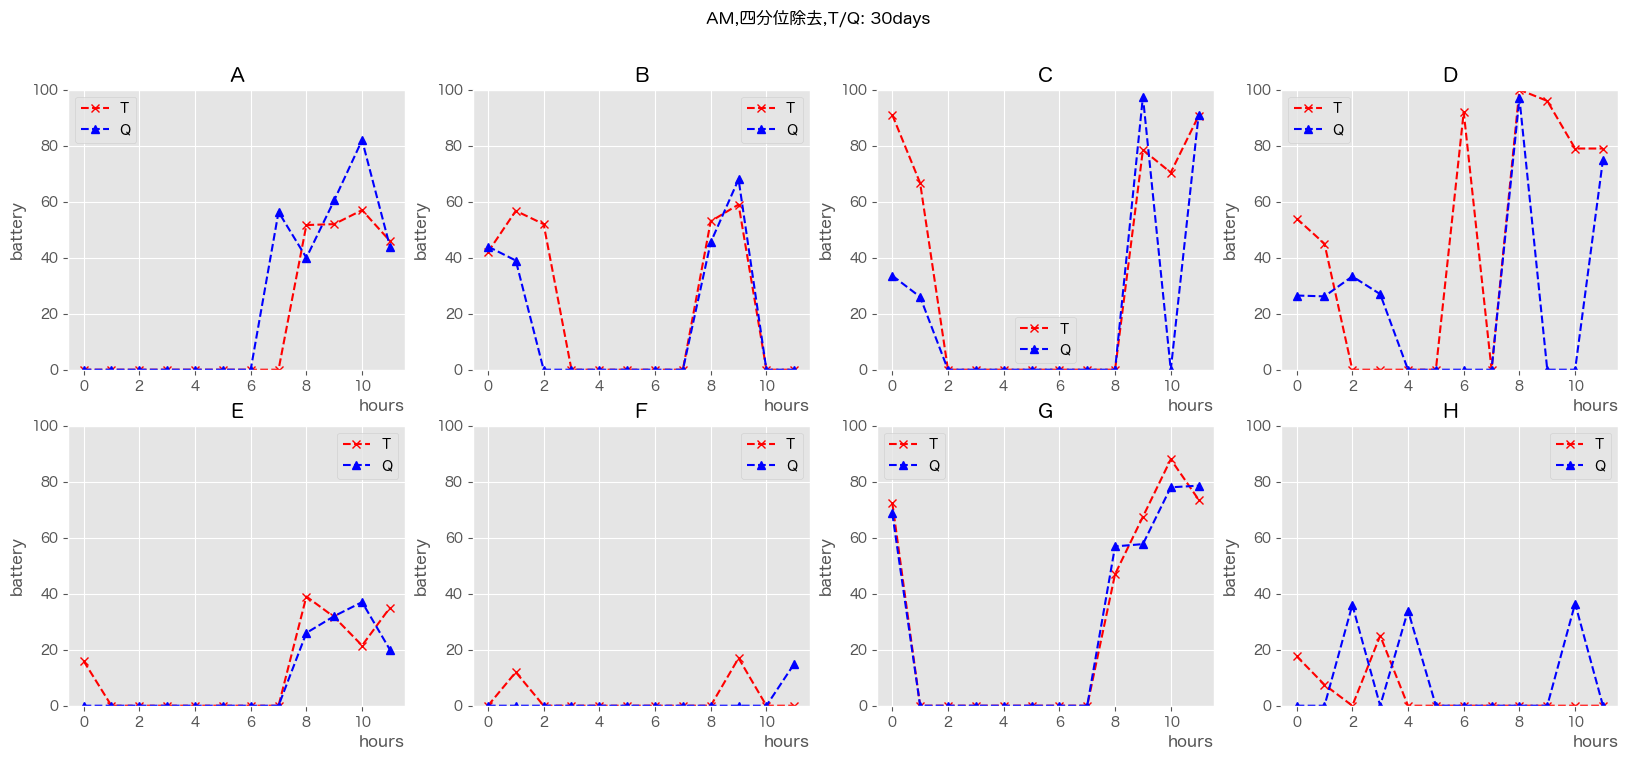

In [172]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
p_name = ["A", "B", "C", "D", "E", "F", "G", "H"]
fig.suptitle("AM,四分位除去,T/Q: 30days")

ori, after = 0, 0

for g in range(len(users)):
    n = 30
    user = users[g]
    f_date = dt.datetime.strptime("2021-12-20", "%Y-%m-%d")
    l_date = f_date + dt.timedelta(days=n)

    f2_date = l_date + dt.timedelta(days=1)
    l2_date = f2_date + dt.timedelta(days=n)

    # print(f_date, l_date, f2_date, l2_date)

    Nari_T = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f_date)
            & (df["date"] < l_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    hoge = []
    baa = []
    for i in range(0, 12):
        baa = np.array(
            Nari_T.loc[
                (Nari_T["time_to_num"] > 3600 * i)
                & (Nari_T["time_to_num"] < 3600 * (i + 1))
            ]["battery"]
        )
        # print(len(baa), len(baa[np.where((baa >= q1) & (baa <= q3))]))
        # print(baa)
        # print(baa[np.where((baa >= q1) & (baa <= q3))])
        if len(baa) != 1:
            try:
                q1 = np.percentile(baa, q=25)
                q3 = np.percentile(baa, q=75)
                hoge.append(baa[np.where((baa >= q1) & (baa <= q3))].mean())
            except:
                hoge.append(0)
        else:
            hoge.append(0)
    hoge = np.nan_to_num(hoge)
    # print(hoge)

    Nari_Q = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f2_date)
            & (df["date"] < l2_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    foo = []
    baa = []
    for i in range(0, 12):
        baa = np.array(
            Nari_Q.loc[
                (Nari_Q["time_to_num"] > 3600 * i)
                & (Nari_Q["time_to_num"] < 3600 * (i + 1))
            ]["battery"]
        )
        # print(len(baa), len(baa[np.where((baa >= q1) & (baa <= q3))]))
        if len(baa) != 1:
            try:
                q1 = np.percentile(baa, q=25)
                q3 = np.percentile(baa, q=75)
                foo.append(baa[np.where((baa >= q1) & (baa <= q3))].mean())
            except:
                foo.append(0)
        else:
            foo.append(0)
    foo = np.nan_to_num(foo)
    # print(foo)

    if g < 4:
        axes[0, g].set_title("{}".format(p_name[g]))
        axes[0, g].plot(hoge, "x--r", label="T")
        axes[0, g].plot(foo, "^--b", label="Q")
        axes[0, g].set_xlabel("hours", loc="right")
        axes[0, g].set_ylabel("battery")
        axes[0, g].set_ylim(0, 100)
        axes[0, g].legend()
    else:
        axes[1, (g - 4)].set_title("{}".format(p_name[g]))
        axes[1, (g - 4)].plot(hoge, "x--r", label="T")
        axes[1, (g - 4)].plot(foo, "^--b", label="Q")
        axes[1, (g - 4)].set_ylim(0, 100)
        axes[1, (g - 4)].set_xlabel("hours", loc="right")
        axes[1, (g - 4)].set_ylabel("battery")
        axes[1, (g - 4)].legend()

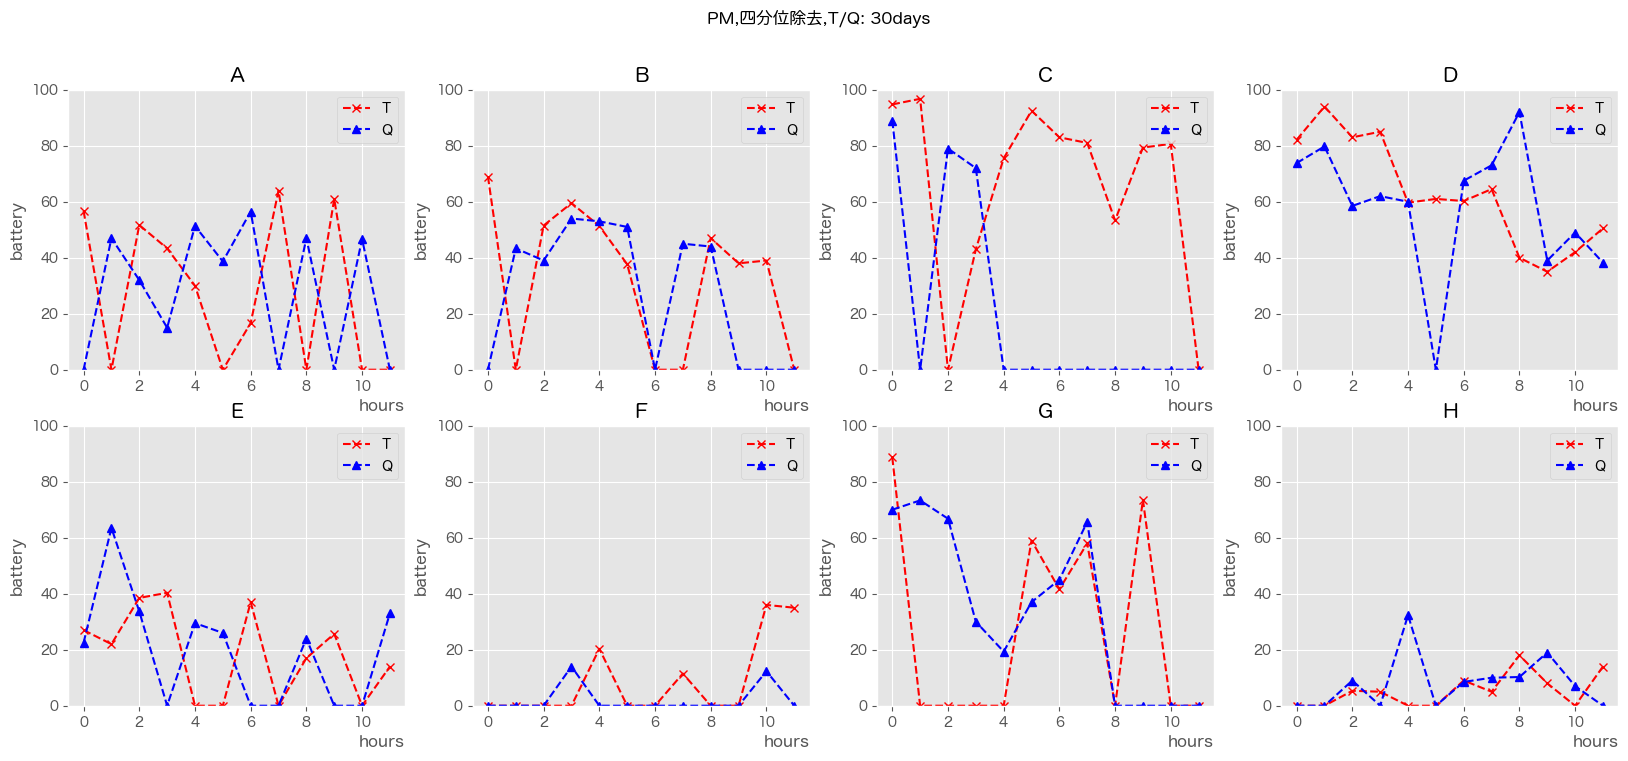

In [173]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
p_name = ["A", "B", "C", "D", "E", "F", "G", "H"]
fig.suptitle("PM,四分位除去,T/Q: 30days")

ori, after = 0, 0

for g in range(len(users)):
    n = 30
    user = users[g]
    f_date = dt.datetime.strptime("2021-12-20", "%Y-%m-%d")
    l_date = f_date + dt.timedelta(days=n)

    f2_date = l_date + dt.timedelta(days=1)
    l2_date = f2_date + dt.timedelta(days=n)

    # print(f_date, l_date, f2_date, l2_date)

    Nari_T = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f_date)
            & (df["date"] < l_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    hoge = []
    baa = []
    for i in range(12, 24):
        baa = np.array(
            Nari_T.loc[
                (Nari_T["time_to_num"] > 3600 * i)
                & (Nari_T["time_to_num"] < 3600 * (i + 1))
            ]["battery"]
        )
        # print(len(baa), len(baa[np.where((baa >= q1) & (baa <= q3))]))
        # print(baa)
        # print(baa[np.where((baa >= q1) & (baa <= q3))])
        if len(baa) != 1:
            try:
                q1 = np.percentile(baa, q=25)
                q3 = np.percentile(baa, q=75)
                hoge.append(baa[np.where((baa >= q1) & (baa <= q3))].mean())
            except:
                hoge.append(0)
        else:
            hoge.append(0)
    hoge = np.nan_to_num(hoge)
    # print(hoge)

    Nari_Q = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f2_date)
            & (df["date"] < l2_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    foo = []
    baa = []
    for i in range(12, 24):
        baa = np.array(
            Nari_Q.loc[
                (Nari_Q["time_to_num"] > 3600 * i)
                & (Nari_Q["time_to_num"] < 3600 * (i + 1))
            ]["battery"]
        )
        # print(len(baa), len(baa[np.where((baa >= q1) & (baa <= q3))]))
        if len(baa) != 1:
            try:
                q1 = np.percentile(baa, q=25)
                q3 = np.percentile(baa, q=75)
                foo.append(baa[np.where((baa >= q1) & (baa <= q3))].mean())
            except:
                foo.append(0)
        else:
            foo.append(0)
    foo = np.nan_to_num(foo)
    # print(foo)

    if g < 4:
        axes[0, g].set_title("{}".format(p_name[g]))
        axes[0, g].plot(hoge, "x--r", label="T")
        axes[0, g].plot(foo, "^--b", label="Q")
        axes[0, g].set_xlabel("hours", loc="right")
        axes[0, g].set_ylabel("battery")
        axes[0, g].set_ylim(0, 100)
        axes[0, g].legend()
    else:
        axes[1, (g - 4)].set_title("{}".format(p_name[g]))
        axes[1, (g - 4)].plot(hoge, "x--r", label="T")
        axes[1, (g - 4)].plot(foo, "^--b", label="Q")
        axes[1, (g - 4)].set_ylim(0, 100)
        axes[1, (g - 4)].set_xlabel("hours", loc="right")
        axes[1, (g - 4)].set_ylabel("battery")
        axes[1, (g - 4)].legend()

1163
941
80.91143594153053


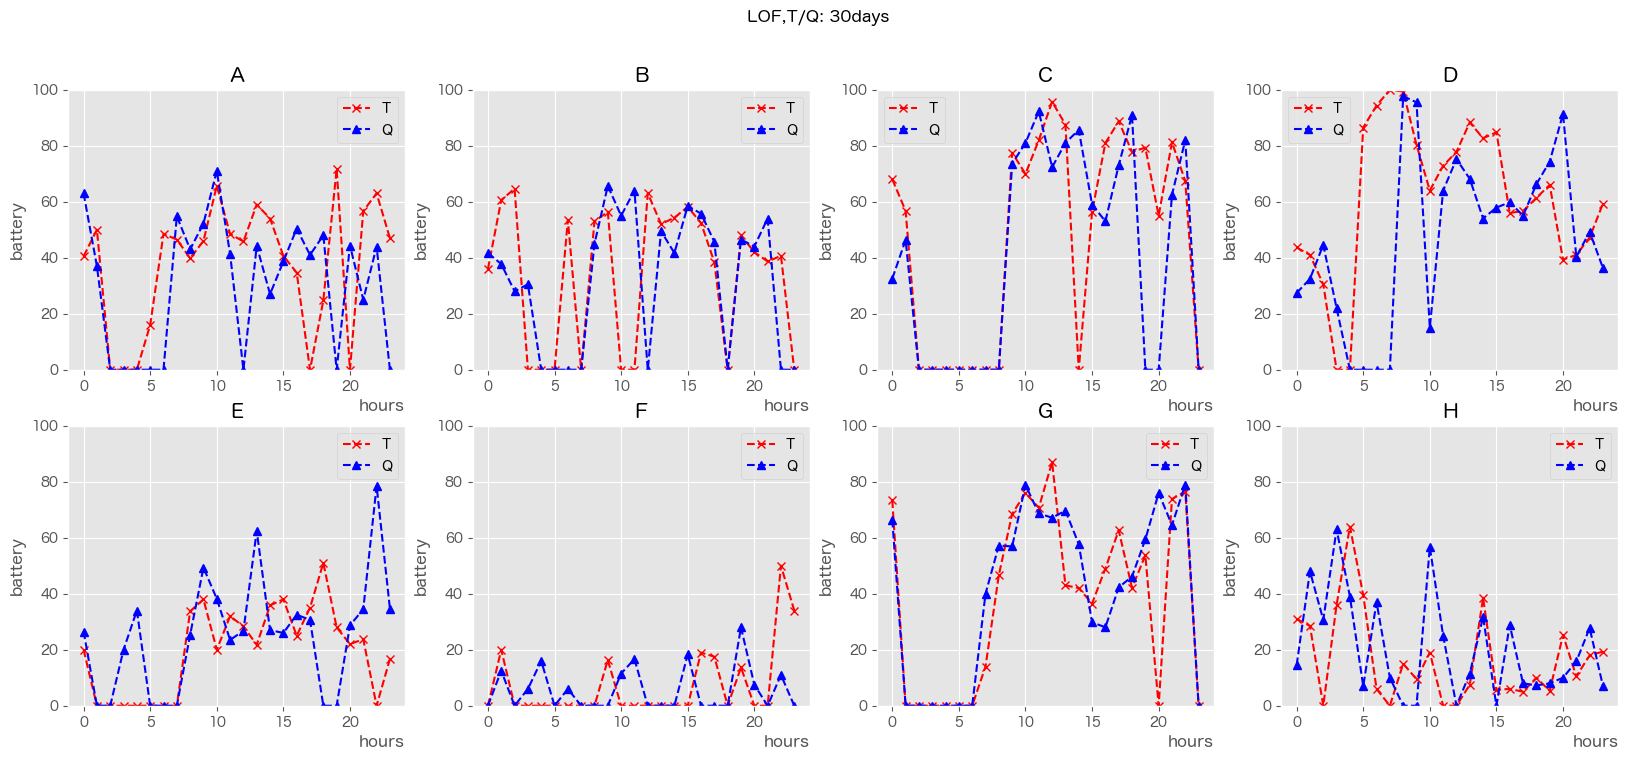

In [184]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
p_name = ["A", "B", "C", "D", "E", "F", "G", "H"]
fig.suptitle("LOF,T/Q: 30days")

ori, after = 0, 0

clf = LocalOutlierFactor(n_neighbors=2)

for g in range(len(users)):
    n = 30
    user = users[g]
    f_date = dt.datetime.strptime("2021-12-20", "%Y-%m-%d")
    l_date = f_date + dt.timedelta(days=n)

    f2_date = l_date + dt.timedelta(days=1)
    l2_date = f2_date + dt.timedelta(days=n)

    # print(f_date, l_date, f2_date, l2_date)

    Nari_T = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f_date)
            & (df["date"] < l_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )
    ori += len(Nari_T)
    Nari_T_np = np.array(Nari_T)

    pred = clf.fit_predict(np.array(Nari_T_np))
    Nari_T = pd.DataFrame(
        [
            Nari_T_np[:, 0][np.where(pred > 0)],
            Nari_T_np[:, 1][np.where(pred > 0)],
        ]
    ).T
    Nari_T = Nari_T.rename(columns={0: "battery", 1: "time_to_num"})
    after += len(Nari_T)

    hoge = []
    for i in range(0, 24):
        hoge.append(
            np.array(
                Nari_T.loc[
                    (Nari_T["time_to_num"] > 3600 * i)
                    & (Nari_T["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    hoge = np.nan_to_num(hoge)  # print(hoge)

    Nari_Q = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f2_date)
            & (df["date"] < l2_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )
    ori += len(Nari_Q)
    Nari_Q_np = np.array(Nari_Q)

    pred = clf.fit_predict(np.array(Nari_Q_np))
    Nari_Q = pd.DataFrame(
        [
            Nari_Q_np[:, 0][np.where(pred > 0)],
            Nari_Q_np[:, 1][np.where(pred > 0)],
        ]
    ).T
    Nari_Q = Nari_Q.rename(columns={0: "battery", 1: "time_to_num"})
    after += len(Nari_Q)

    foo = []
    for i in range(0, 24):
        foo.append(
            np.array(
                Nari_Q.loc[
                    (Nari_Q["time_to_num"] > 3600 * i)
                    & (Nari_Q["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    foo = np.nan_to_num(foo)
    # print(foo)

    if g < 4:
        axes[0, g].set_title("{}".format(p_name[g]))
        axes[0, g].plot(hoge, "x--r", label="T")
        axes[0, g].plot(foo, "^--b", label="Q")
        axes[0, g].set_xlabel("hours", loc="right")
        axes[0, g].set_ylabel("battery")
        axes[0, g].set_ylim(0, 100)
        axes[0, g].legend()
    else:
        axes[1, (g - 4)].set_title("{}".format(p_name[g]))
        axes[1, (g - 4)].plot(hoge, "x--r", label="T")
        axes[1, (g - 4)].plot(foo, "^--b", label="Q")
        axes[1, (g - 4)].set_ylim(0, 100)
        axes[1, (g - 4)].set_xlabel("hours", loc="right")
        axes[1, (g - 4)].set_ylabel("battery")
        axes[1, (g - 4)].legend()
print(ori)
print(after)
print(after / ori * 100)

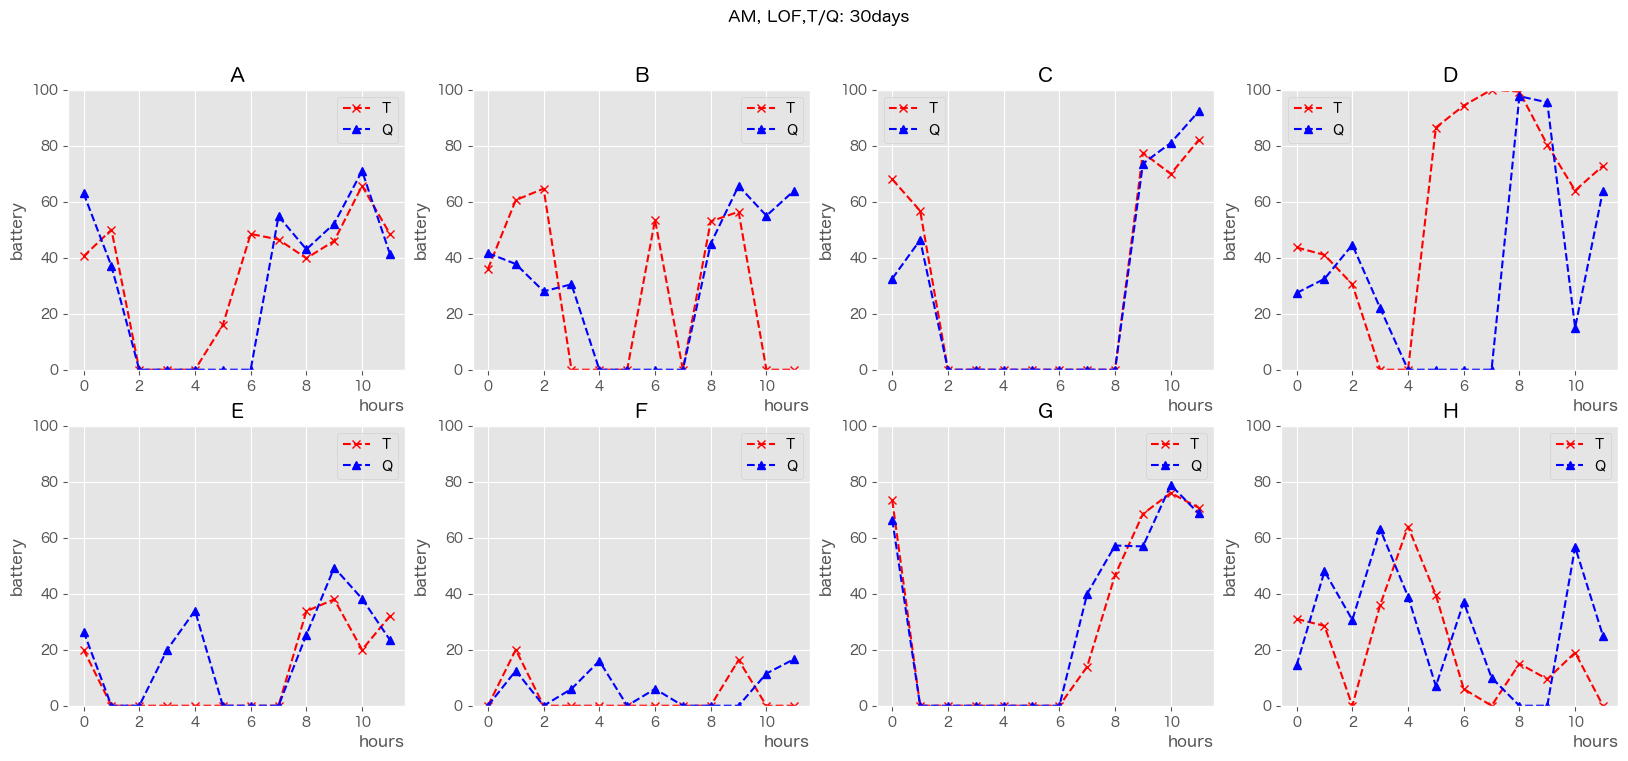

In [174]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
p_name = ["A", "B", "C", "D", "E", "F", "G", "H"]
fig.suptitle("AM, LOF,T/Q: 30days")

clf = LocalOutlierFactor(n_neighbors=2)

for g in range(len(users)):
    n = 30
    user = users[g]
    f_date = dt.datetime.strptime("2021-12-20", "%Y-%m-%d")
    l_date = f_date + dt.timedelta(days=n)

    f2_date = l_date + dt.timedelta(days=1)
    l2_date = f2_date + dt.timedelta(days=n)

    # print(f_date, l_date, f2_date, l2_date)

    Nari_T = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f_date)
            & (df["date"] < l_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    Nari_T_np = np.array(Nari_T)

    pred = clf.fit_predict(np.array(Nari_T_np))
    Nari_T = pd.DataFrame(
        [
            Nari_T_np[:, 0][np.where(pred > 0)],
            Nari_T_np[:, 1][np.where(pred > 0)],
        ]
    ).T
    Nari_T = Nari_T.rename(columns={0: "battery", 1: "time_to_num"})

    hoge = []
    for i in range(0, 12):
        hoge.append(
            np.array(
                Nari_T.loc[
                    (Nari_T["time_to_num"] > 3600 * i)
                    & (Nari_T["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    hoge = np.nan_to_num(hoge)  # print(hoge)

    Nari_Q = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f2_date)
            & (df["date"] < l2_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )
    Nari_Q_np = np.array(Nari_Q)

    pred = clf.fit_predict(np.array(Nari_Q_np))
    Nari_Q = pd.DataFrame(
        [
            Nari_Q_np[:, 0][np.where(pred > 0)],
            Nari_Q_np[:, 1][np.where(pred > 0)],
        ]
    ).T
    Nari_Q = Nari_Q.rename(columns={0: "battery", 1: "time_to_num"})

    foo = []
    for i in range(0, 12):
        foo.append(
            np.array(
                Nari_Q.loc[
                    (Nari_Q["time_to_num"] > 3600 * i)
                    & (Nari_Q["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    foo = np.nan_to_num(foo)
    # print(foo)

    if g < 4:
        axes[0, g].set_title("{}".format(p_name[g]))
        axes[0, g].plot(hoge, "x--r", label="T")
        axes[0, g].plot(foo, "^--b", label="Q")
        axes[0, g].set_xlabel("hours", loc="right")
        axes[0, g].set_ylabel("battery")
        axes[0, g].set_ylim(0, 100)
        axes[0, g].legend()
    else:
        axes[1, (g - 4)].set_title("{}".format(p_name[g]))
        axes[1, (g - 4)].plot(hoge, "x--r", label="T")
        axes[1, (g - 4)].plot(foo, "^--b", label="Q")
        axes[1, (g - 4)].set_ylim(0, 100)
        axes[1, (g - 4)].set_xlabel("hours", loc="right")
        axes[1, (g - 4)].set_ylabel("battery")
        axes[1, (g - 4)].legend()

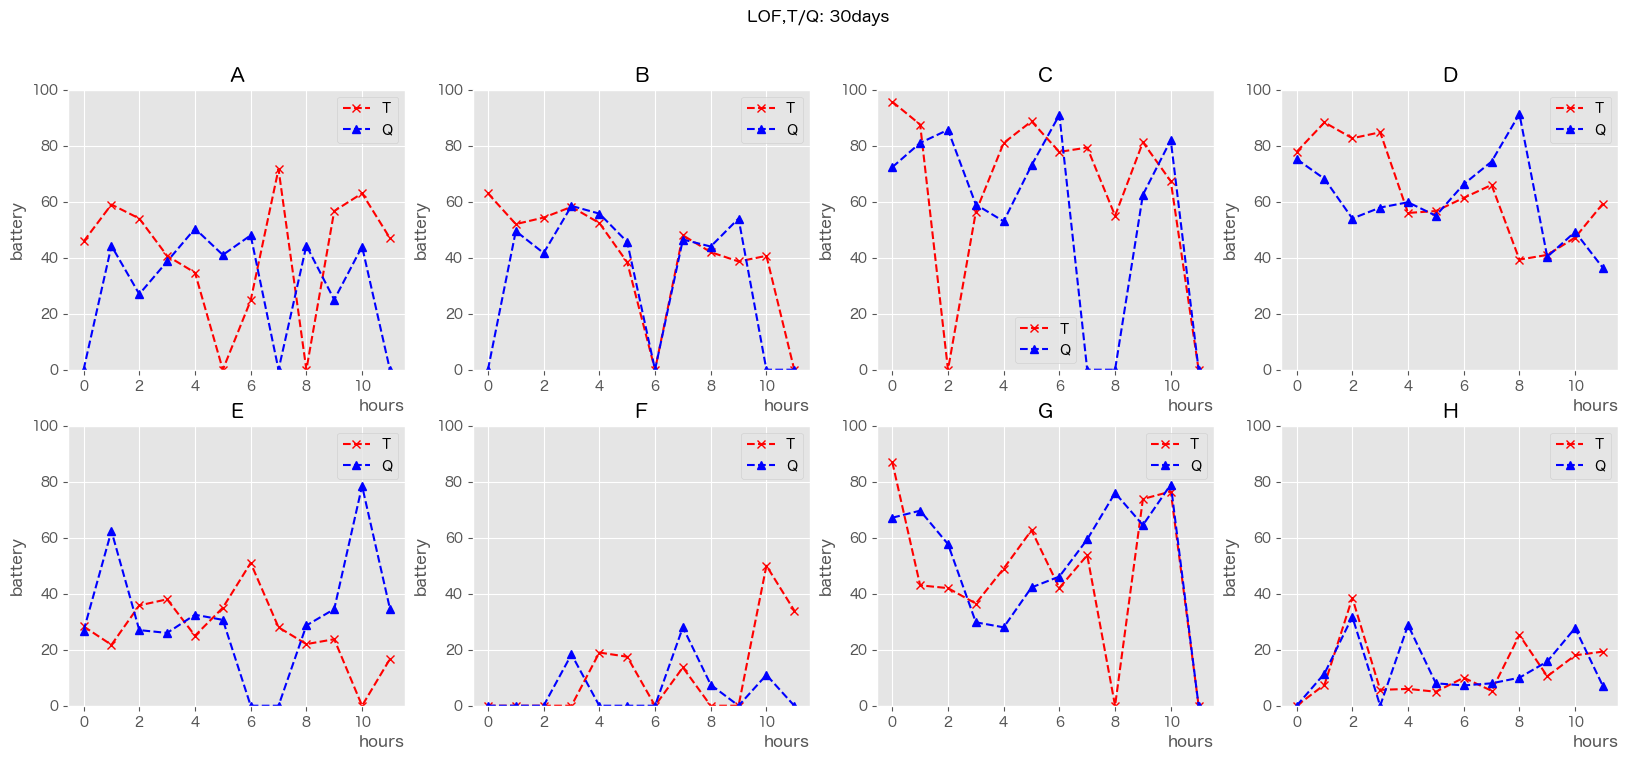

In [175]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
p_name = ["A", "B", "C", "D", "E", "F", "G", "H"]
fig.suptitle("PM, LOF,T/Q: 30days")

clf = LocalOutlierFactor(n_neighbors=2)

for g in range(len(users)):
    n = 30
    user = users[g]
    f_date = dt.datetime.strptime("2021-12-20", "%Y-%m-%d")
    l_date = f_date + dt.timedelta(days=n)

    f2_date = l_date + dt.timedelta(days=1)
    l2_date = f2_date + dt.timedelta(days=n)

    # print(f_date, l_date, f2_date, l2_date)

    Nari_T = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f_date)
            & (df["date"] < l_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )

    Nari_T_np = np.array(Nari_T)

    pred = clf.fit_predict(np.array(Nari_T_np))
    Nari_T = pd.DataFrame(
        [
            Nari_T_np[:, 0][np.where(pred > 0)],
            Nari_T_np[:, 1][np.where(pred > 0)],
        ]
    ).T
    Nari_T = Nari_T.rename(columns={0: "battery", 1: "time_to_num"})

    hoge = []
    for i in range(12, 24):
        hoge.append(
            np.array(
                Nari_T.loc[
                    (Nari_T["time_to_num"] > 3600 * i)
                    & (Nari_T["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    hoge = np.nan_to_num(hoge)  # print(hoge)

    Nari_Q = pd.DataFrame(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > f2_date)
            & (df["date"] < l2_date)
            # & (df["weekday"] == weekday)
        ][["battery", "time_to_num"]].copy()
    )
    Nari_Q_np = np.array(Nari_Q)

    pred = clf.fit_predict(np.array(Nari_Q_np))
    Nari_Q = pd.DataFrame(
        [
            Nari_Q_np[:, 0][np.where(pred > 0)],
            Nari_Q_np[:, 1][np.where(pred > 0)],
        ]
    ).T
    Nari_Q = Nari_Q.rename(columns={0: "battery", 1: "time_to_num"})

    foo = []
    for i in range(12, 24):
        foo.append(
            np.array(
                Nari_Q.loc[
                    (Nari_Q["time_to_num"] > 3600 * i)
                    & (Nari_Q["time_to_num"] < 3600 * (i + 1))
                ]["battery"]
            ).mean()
        )
    foo = np.nan_to_num(foo)
    # print(foo)

    if g < 4:
        axes[0, g].set_title("{}".format(p_name[g]))
        axes[0, g].plot(hoge, "x--r", label="T")
        axes[0, g].plot(foo, "^--b", label="Q")
        axes[0, g].set_xlabel("hours", loc="right")
        axes[0, g].set_ylabel("battery")
        axes[0, g].set_ylim(0, 100)
        axes[0, g].legend()
    else:
        axes[1, (g - 4)].set_title("{}".format(p_name[g]))
        axes[1, (g - 4)].plot(hoge, "x--r", label="T")
        axes[1, (g - 4)].plot(foo, "^--b", label="Q")
        axes[1, (g - 4)].set_ylim(0, 100)
        axes[1, (g - 4)].set_xlabel("hours", loc="right")
        axes[1, (g - 4)].set_ylabel("battery")
        axes[1, (g - 4)].legend()